# Natural disasters, Climate change and Economic development

## 1. Motivation

### 1.1 What is your dataset?

We first decided we wanted to analyze and visualize the effect of natural disasters, especially droughts and heatwaves; the dataset on the impact of natural disasters from 1900 was obtained from.... . It is known that natural disasters are getting more frequent with climate change, but we wanted to look into how natural disasters affected different countries based on how developed their economy os and their economic indicators. Therefore we also used economic and social data, such as GDP,  agriculture data, income data, and water and energy use. We also used population data to normalize and visualize our data. The economic and social data came from the world bank.

### 1.2 Why did you choose this/these particular dataset(s)?

The dataset about the effect of disasters from 1900 was our main interest, motivation and gave us the idea for the project. The population data was used to normalize and in some of the visualizations. We chose the specific economic indicators because .... 

### 1.3 What was your goal for the end user´s experience?

We wanted to tell the story of how natural disasters do not discriminate. Instead, they exacerbate existing inequalities, hitting countries with limited economic resources the hardest in an interactive and exploratory way. Give the reader a better insight into how natural disasters affect less economically developed countries and that the impact of climate change is also a server equity case. 

## 2. Basic stats 

We begin by importing all of the packages needed for the project

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim

In [2]:
import plotly.express as px
import plotly.graph_objs as go

### 2.1 Data preperation and cleaning 
#### *Write about your choices in data cleaning and preprocessing

Lets now import all the datasets 

In [3]:
# Opening file

names = ["Dis No"]

#Natural_Disasters = pd.read_csv('NaturalDisastersv3.xlsx',names=names, lineterminator='\n', nrows=25882)
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [4]:
#there are also data for technological disasters so we are choosing Natural Disasters

Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']

#there are some natural disasters that there are very few data
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')
                    & (Natural_Disasters['Disaster Subtype']!='Ash fall')]
# print( pd.unique(Natural_Disasters['Disaster Subtype'].values))
# & (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')]



#cols=["year","month","day"]
#df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [5]:
Countries_GDPC = pd.read_excel('GDP_per_capita.xls')

In [ ]:
population = pd.read_excel('population.xls')

quite a lot of data cleaning had to take place on the data sets to be able to merge the all data together

lets get the GDP per captia for all of the countries in the right form, 

In [7]:
# Drop the first 3 rows of the DataFrame
Countries_GDPC = Countries_GDPC.drop([0, 1])

# Set the 4th row as the column index
Countries_GDPC.columns = Countries_GDPC.iloc[0]
Countries_GDPC = Countries_GDPC.drop(Countries_GDPC.index[0])

Countries_GDPC.index = Countries_GDPC.index.astype(int)
Countries_GDPC = Countries_GDPC.reset_index(drop=True)

Countries_GDPC = Countries_GDPC.drop('Indicator Name', axis=1)
Countries_GDPC = Countries_GDPC.drop('Indicator Code', axis=1)

Rename the year columns


In [11]:

old_names = list(Countries_GDPC.columns)
old_names = old_names[2:]


In [12]:
new_names = [str(year) for year in range(1960, 2022)]
name_map = dict(zip(old_names, new_names))

In [13]:
Countries_GDPC = Countries_GDPC.rename(columns=name_map)

In [14]:
Countries_GDPC = Countries_GDPC.drop('Country Name', axis=1)

Now we convert the dataset from having the years as columns to only having one column to indicate the years

In [16]:
df_melted = Countries_GDPC.melt(id_vars=['Country Code'], var_name='year', value_name='GDPC')
df_melted= df_melted.rename(columns={'Country Code': 'ISO','year':'Year'})

Now lest do the same for the population data

In [21]:
# Drop the first 2 rows of the DataFrame
population = population.drop([0, 1])

# Set the 4th row as the column index
population.columns = population.iloc[0]
population = population.drop(population.index[0])

population.index = population.index.astype(int)
population = population.reset_index(drop=True)
population = population.drop('Indicator Name', axis=1)
population = population.drop('Indicator Code', axis=1)

In [25]:
old_names = list(population.columns)
old_names = old_names[2:]

In [26]:
new_names = [str(year) for year in range(1960, 2022)]
name_map = dict(zip(old_names, new_names))

In [27]:
population = population.rename(columns=name_map)
population = population.drop('Country Name', axis=1)

In [30]:
df_melted_pop = population.melt(id_vars=['Country Code'], var_name='year', value_name='population')
df_melted_pop= df_melted_pop.rename(columns={'Country Code': 'ISO','year':'Year'})

Lets now merge the natural disaster dataset with data about countries GDP per capita and population. 

In [34]:
NDdf = Natural_Disasters[['Dis No', 'Country','ISO', 'Region', 'Continent','Year','Total Deaths', 'Total Affected',
       "Total Damages ('000 US$)"]]

In [35]:
NDdf = NDdf[NDdf['Year'] >= 1973]

In [36]:
NDdf

,Dis No,Country,ISO,Region,Continent,Year,Total Deaths,Total Affected,Total Damages ('000 US$)
904,1973-9005-ETH,Ethiopia,ETH,Eastern Africa,Africa,1973,100000.0,3000000.0,76000.0
905,1973-0002-ARG,Argentina,ARG,South America,Americas,1973,60.0,300.0,NaN
906,1973-0051-AUS,Australia,AUS,Australia and New Zealand,Oceania,1973,12.0,12000.0,71000.0
907,1973-0053-BGD,Bangladesh,BGD,Southern Asia,Asia,1973,1000.0,NaN,NaN
908,1973-0023-BGD,Bangladesh,BGD,Southern Asia,Asia,1973,200.0,50000.0,NaN
...,...,...,...,...,...,...,...,...,...
25876,2023-0032-USA,United States of America (the),USA,Northern America,Americas,2023,11.0,49.0,NaN
25878,2023-0080-ZAF,South Africa,ZAF,Southern Africa,Africa,2023,17.0,1000.0,NaN
25879,2023-0110-ZMB,Zambia,ZMB,Eastern Africa,Africa,2023,NaN,154608.0,NaN
25880,2023-0068-ZMB,Zambia,ZMB,Eastern Africa,Africa,2023,2.0,118.0,NaN


In [37]:
ISO_Region_Continent = NDdf[['Country','ISO', 'Region', 'Continent']]
ISO_Region_Continent = ISO_Region_Continent.groupby(['ISO']).first().reset_index()

In [38]:
ISO_Region_Continent

,ISO,Country,Region,Continent
0,AFG,Afghanistan,Southern Asia,Asia
1,AGO,Angola,Middle Africa,Africa
2,AIA,Anguilla,Caribbean,Americas
3,ALB,Albania,Southern Europe,Europe
4,ANT,Netherlands Antilles,Caribbean,Americas
...,...,...,...,...
223,YMN,Yemen Arab Rep,Western Asia,Asia
224,YUG,Yugoslavia,Southern Europe,Europe
225,ZAF,South Africa,Southern Africa,Africa
226,ZMB,Zambia,Eastern Africa,Africa


In [39]:
NDdf_Country = NDdf.groupby(['ISO','Year']).sum()

In [40]:
NDdf_Country

Total Deaths  Total Affected  Total Damages ('000 US$)
ISO Year                                                        
AFG 1976          51.0         80000.0                       0.0
    1978         120.0        271684.0                   52000.0
    1980           0.0         30000.0                       0.0
    1987          70.0             0.0                       0.0
    1988           0.0        161000.0                  260000.0
...                ...             ...                       ...
ZWE 2017         251.0       7013023.0                  189000.0
    2018          12.0          5164.0                       0.0
    2019         654.0        270186.0                       0.0
    2021           3.0        169900.0                       0.0
    2022         750.0          9551.0                       0.0

[4731 rows x 3 columns]

In [41]:
df_melted['Year'] = df_melted['Year'].astype('int64')
df_melted_pop['Year'] = df_melted_pop['Year'].astype('int64')

In [42]:
ND_GDPC_Country = pd.merge(NDdf_Country, df_melted, on=['ISO','Year'])

In [43]:
ND_GDPC_Country = pd.merge(ND_GDPC_Country , df_melted_pop, on=['ISO','Year'])

In [44]:
ND_GDPC_Country

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population
0,AFG,1976,51.0,80000.0,0.0,205.674097,12425267.0
1,AFG,1978,120.0,271684.0,52000.0,255.045622,12938862.0
2,AFG,1980,0.0,30000.0,0.0,291.649791,12486631.0
3,AFG,1987,70.0,0.0,0.0,NaN,10322758.0
4,AFG,1988,0.0,161000.0,260000.0,NaN,10383460.0
...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0


In [45]:
ND_GDPC = pd.merge(ND_GDPC_Country, ISO_Region_Continent, on=['ISO'])

In [46]:
ND_GDPC

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population,Country,Region,Continent
0,AFG,1976,51.0,80000.0,0.0,205.674097,12425267.0,Afghanistan,Southern Asia,Asia
1,AFG,1978,120.0,271684.0,52000.0,255.045622,12938862.0,Afghanistan,Southern Asia,Asia
2,AFG,1980,0.0,30000.0,0.0,291.649791,12486631.0,Afghanistan,Southern Asia,Asia
3,AFG,1987,70.0,0.0,0.0,NaN,10322758.0,Afghanistan,Southern Asia,Asia
4,AFG,1988,0.0,161000.0,260000.0,NaN,10383460.0,Afghanistan,Southern Asia,Asia
...,...,...,...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0,Zimbabwe,Eastern Africa,Africa
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0,Zimbabwe,Eastern Africa,Africa
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0,Zimbabwe,Eastern Africa,Africa
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0,Zimbabwe,Eastern Africa,Africa


In [47]:
ND_GDPC['Deaths per 100K'] = (ND_GDPC['Total Deaths']/ND_GDPC['population'])*1000000

In [48]:
ND_GDPC['Affected per 100K'] = (ND_GDPC['Total Affected']/ND_GDPC['population'])*1000000

In [49]:
ND_GDPC

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population,Country,Region,Continent,Deaths per 100K,Affected per 100K
0,AFG,1976,51.0,80000.0,0.0,205.674097,12425267.0,Afghanistan,Southern Asia,Asia,4.104540,6438.493434
1,AFG,1978,120.0,271684.0,52000.0,255.045622,12938862.0,Afghanistan,Southern Asia,Asia,9.274386,20997.518947
2,AFG,1980,0.0,30000.0,0.0,291.649791,12486631.0,Afghanistan,Southern Asia,Asia,0.000000,2402.569596
3,AFG,1987,70.0,0.0,0.0,NaN,10322758.0,Afghanistan,Southern Asia,Asia,6.781133,0.000000
4,AFG,1988,0.0,161000.0,260000.0,NaN,10383460.0,Afghanistan,Southern Asia,Asia,0.000000,15505.428826
...,...,...,...,...,...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0,Zimbabwe,Eastern Africa,Africa,2.144927,138.382409
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0,Zimbabwe,Eastern Africa,Africa,17.015679,475423.698882
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0,Zimbabwe,Eastern Africa,Africa,0.797227,343.073138
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0,Zimbabwe,Eastern Africa,Africa,42.593077,17596.411449


In [50]:
ND_GDPC_Continent = ND_GDPC.groupby(['Continent','Year']).agg({'Total Deaths': 'sum','Total Affected': 'sum', "Total Damages ('000 US$)": 'sum','Deaths per 100K':'sum',
                                                               'Affected per 100K':'sum', 'GDPC' :'mean'}) 

In [51]:
ND_GDPC_Continent

Total Deaths  Total Affected  Total Damages ('000 US$)  \
Continent Year                                                           
Africa    1973      119132.0       3438240.0                   91000.0   
          1974          62.0       2004500.0                   34000.0   
          1975          54.0       1094308.0                  203600.0   
          1976         412.0       7856444.0                  317000.0   
          1977         937.0        743730.0                  418000.0   
...                      ...             ...                       ...   
Oceania   2017          12.0         61094.0                 3303000.0   
          2018           9.0        268760.0                 1296400.0   
          2019         121.0         43672.0                 4000000.0   
          2020          79.0        579530.0                 4135120.0   
          2021          14.0        130841.0                 3622000.0   

                Deaths per 100K  Affected per 100K          GDPC  
Continent Year                                                    
Africa    1973      8003.291779       1.874680e+05    293.692613  
          1974         3.357977       4.423234e+05    583.670042  
          1975        14.194781       9.512085e+05    373.635862  
          1976        23.321472       2.277799e+06    301.450268  
          1977        69.384801       4.266644e+05    501.026183  
...                         ...                ...           ...  
Oceania   2017         0.487920       2.834550e+04  29909.322179  
          2018        47.375278       1.030966e+06  16700.509990  
          2019       394.364519       1.303529e+05  12731.651833  
          2020        89.749885       1.598557e+06  14413.360568  
          2021         6.956936       1.406079e+06  28124.364405  

[245 rows x 6 columns]

In [52]:
ND_GDPC_Continent_d = ND_GDPC_Continent['Deaths per 100K']
ND_GDPC_Continent_a = ND_GDPC_Continent['Affected per 100K']
ND_GDPC_Continent_M = ND_GDPC_Continent["Total Damages ('000 US$)"]
ND_GDPC_Continent_GDPC = ND_GDPC_Continent['GDPC']

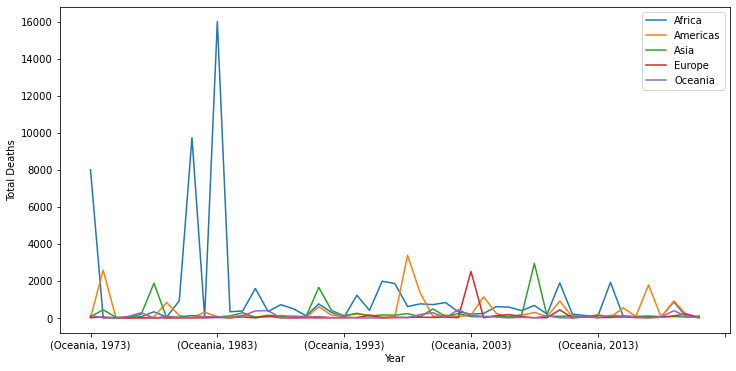

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
for continent, data in ND_GDPC_Continent_d.groupby('Continent'):
    data.plot(ax=ax, label=continent)
    
ax.set_xlabel('Year')
ax.set_ylabel('Total Deaths')
ax.legend()
plt.show()

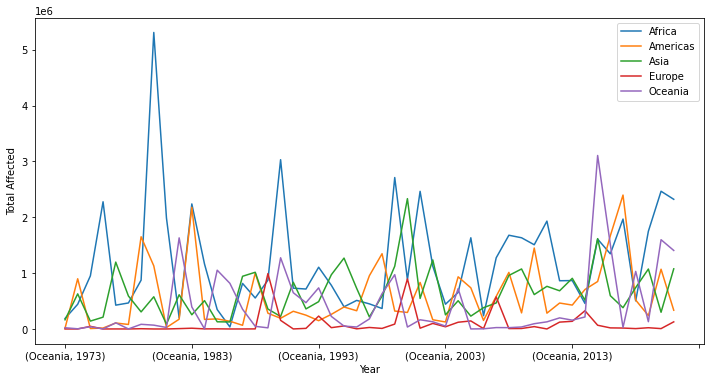

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
for continent, data in ND_GDPC_Continent_a.groupby('Continent'):
    data.plot(ax=ax, label=continent)
    
ax.set_xlabel('Year')
ax.set_ylabel('Total Affected')
ax.legend()
plt.show()

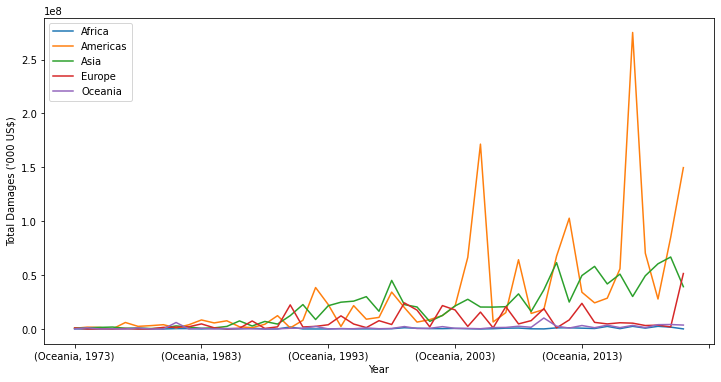

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))
for continent, data in ND_GDPC_Continent_M.groupby('Continent'):
    data.plot(ax=ax, label=continent)
    
ax.set_xlabel('Year')
ax.set_ylabel("Total Damages ('000 US$)")
ax.legend()
plt.show()

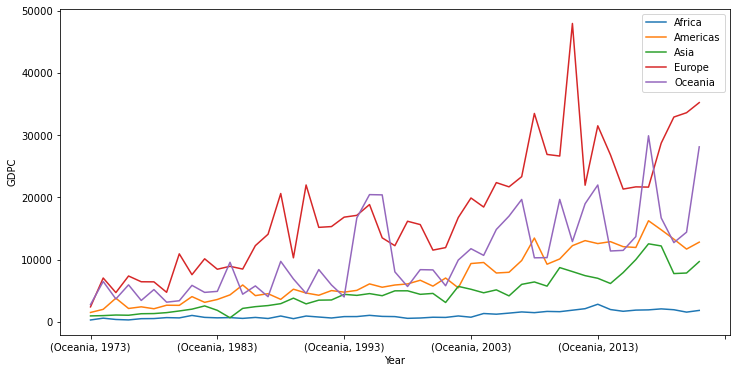

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
for continent, data in ND_GDPC_Continent_GDPC.groupby('Continent'):
    data.plot(ax=ax, label=continent)
    
ax.set_xlabel('Year')
ax.set_ylabel('GDPC')
ax.legend()
plt.show()

In [61]:
ND_GDPC_2010 = ND_GDPC[ND_GDPC['Year'] >= 2010]

In [74]:
ND_GDPC_1992 = ND_GDPC[ND_GDPC['Year'] >= 1992]

In [59]:
years = list(range(1992, 2022))

In [63]:
ND_GDPC_2010

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population,Country,Region,Continent,Deaths per 100K,Affected per 100K
24,AFG,2010,339.0,45130.0,0.0,554.595200,28189672.0,Afghanistan,Southern Asia,Asia,12.025681,1600.940940
25,AFG,2011,83.0,1762815.0,142000.0,621.912311,29249157.0,Afghanistan,Southern Asia,Asia,2.837689,60268.916468
26,AFG,2012,305.0,51264.0,0.0,663.141053,30466479.0,Afghanistan,Southern Asia,Asia,10.011003,1682.636185
27,AFG,2013,113.0,17097.0,0.0,651.987862,31541209.0,Afghanistan,Southern Asia,Asia,3.582615,542.052779
28,AFG,2014,575.0,150135.0,3000.0,628.146804,32716210.0,Afghanistan,Southern Asia,Asia,17.575385,4589.009546
...,...,...,...,...,...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0,Zimbabwe,Eastern Africa,Africa,2.144927,138.382409
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0,Zimbabwe,Eastern Africa,Africa,17.015679,475423.698882
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0,Zimbabwe,Eastern Africa,Africa,0.797227,343.073138
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0,Zimbabwe,Eastern Africa,Africa,42.593077,17596.411449


In [66]:
ND_GDPC_2010['Year'].max()

2021

In [67]:
ND_GDPC_2010['Affected per 100K'].max()

1070582.38511715

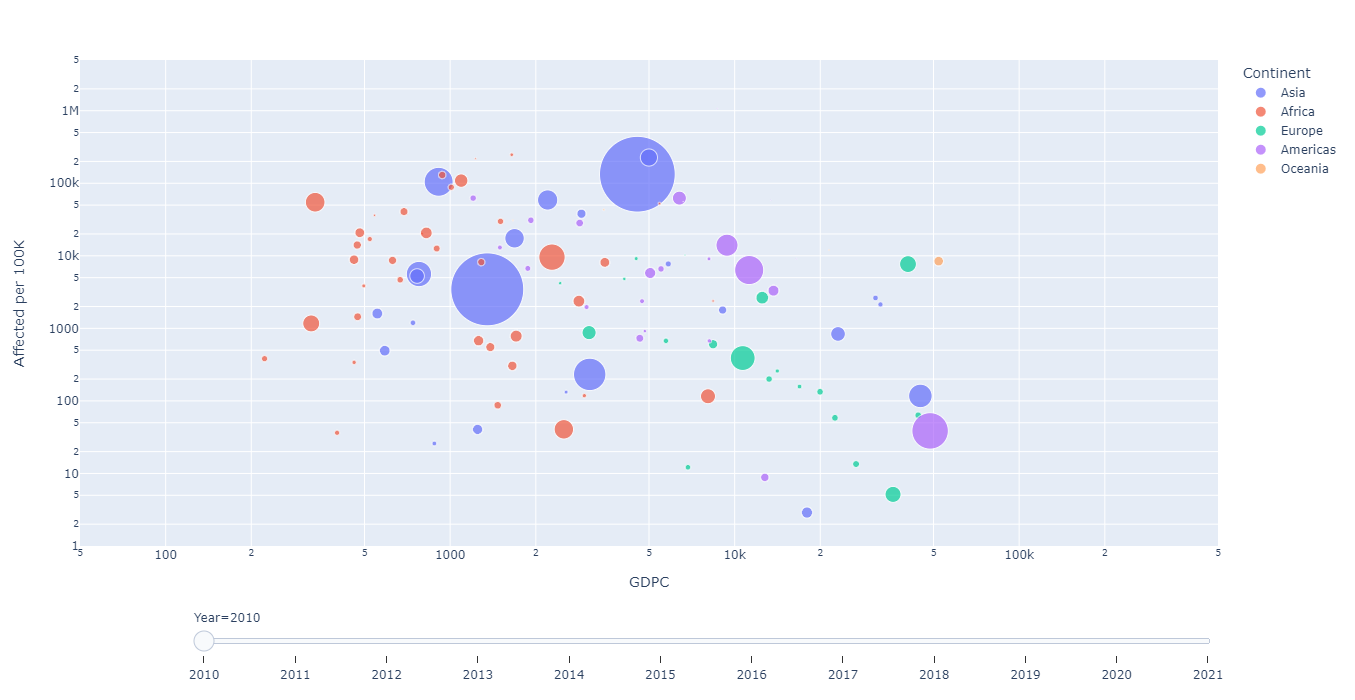

In [71]:
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter(ND_GDPC_2010, x="GDPC", y="Affected per 100K", animation_frame="Year", animation_group="Country",
           size="population", color="Continent", hover_name="Country",
           log_x=True, log_y=True, size_max=55, range_x=[50,500000], range_y=[1,5000000])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(width=900, height=700)
fig.show()

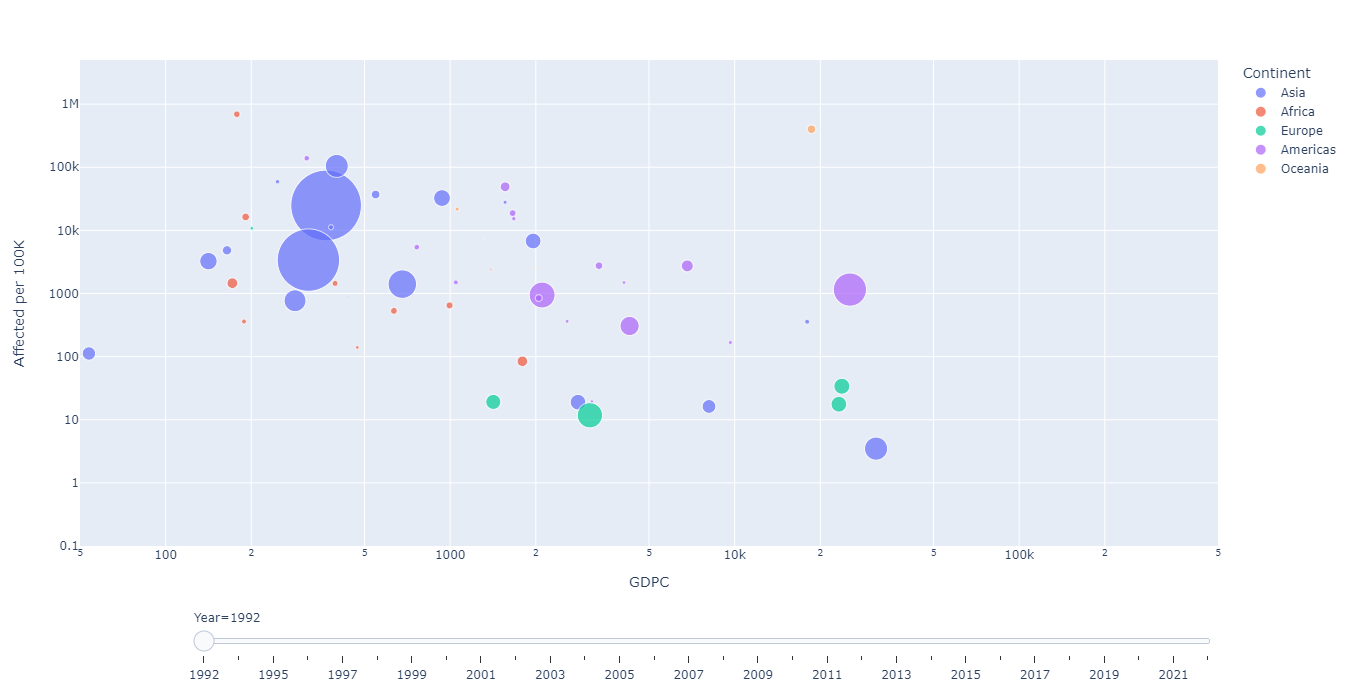

In [78]:
df = px.data.gapminder()
fig = px.scatter(ND_GDPC_1992, x="GDPC", y="Affected per 100K", animation_frame="Year", animation_group="Country",
           size="population", color="Continent", hover_name="Country",
           log_x=True, log_y=True, size_max=55, range_x=[50,500000], range_y=[0.1,5000000])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(width=900, height=700)
fig.write_html("scatter_gdpc.html")
fig.show()

In [76]:
ND_GDPC_1992

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population,Country,Region,Continent,Deaths per 100K,Affected per 100K
7,AFG,1992,600.0,4000.0,4000.0,NaN,12057433.0,Afghanistan,Southern Asia,Asia,49.761836,331.745571
8,AFG,1993,110.0,0.0,0.0,NaN,14003760.0,Afghanistan,Southern Asia,Asia,7.855033,0.000000
9,AFG,1995,27.0,7500.0,0.0,NaN,16418912.0,Afghanistan,Southern Asia,Asia,1.644445,456.790316
10,AFG,1996,70.0,9855.0,0.0,NaN,17106595.0,Afghanistan,Southern Asia,Asia,4.091989,576.093606
11,AFG,1997,170.0,20750.0,0.0,NaN,17788819.0,Afghanistan,Southern Asia,Asia,9.556565,1166.463046
...,...,...,...,...,...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0,Zimbabwe,Eastern Africa,Africa,2.144927,138.382409
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0,Zimbabwe,Eastern Africa,Africa,17.015679,475423.698882
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0,Zimbabwe,Eastern Africa,Africa,0.797227,343.073138
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0,Zimbabwe,Eastern Africa,Africa,42.593077,17596.411449


In [ ]:
ND_GDPC_2019 = ND_GDPC[ND_GDPC['Year']==2019]

In [ ]:
ND_GDPC_2019 

In [ ]:
plt.scatter(ND_GDPC_2019['Total Affected'],ND_GDPC_2019['GDPC'] )
plt.show()

In [ ]:
fig, ax = plt.scatter(ND_GDPC_2019['Total Deaths'],ND_GDPC_2019['GDPC'] )
ax.set_xscale("log");
plt.show()

In [ ]:
ND_GDPC_10_23 = ND_GDPC_Country[ND_GDPC_Country['Year']>=2010]

In [ ]:
ND_GDPC_10_23 = ND_GDPC_10_23.groupby('Country').agg({'Total Deaths': 'sum','Total Affected': 'sum', "Total Damages ('000 US$)": 'sum', 'GDPC':'mean'}) 

In [ ]:
plt.scatter(ND_GDPC_10_23 ['Total Affected'],ND_GDPC_10_23 ['GDPC'] )
plt.show()

In [ ]:
plt.scatter(ND_GDPC_10_23 ['Total Deaths'],ND_GDPC_10_23 ['GDPC'] )
plt.show()

In [ ]:
plt.scatter(ND_GDPC_10_23 ["Total Damages ('000 US$)"],ND_GDPC_10_23 ['GDPC'] )
plt.show()

In [ ]:
ND_GDPC_10_23['GDPC'].max()

In [ ]:
ND_GDPC_10_23['Total Affected'].max()

In [ ]:
max_affected_idx = ND_GDPC_10_23['Total Affected'].idxmax()
max_affected_row = ND_GDPC_10_23.loc[max_affected_idx]

print(max_affected_row)

In [ ]:
NDdf_Continent = NDdf.groupby(['Continent','Year']).sum()

In [ ]:
NDdf_Continent

In [ ]:
ND_GDPC_Country = pd.merge(NDdf_Country, df_melted, on=['Country','Year'])

In [ ]:
NDdf